Goal: Compare using the sample average method to using a constant step size parameter on a non-stationary 10 armed bandit problem.
Prove that sample-average methods have difficulty in non-stationary situations.

In [207]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter

k = 10
qstar = np.random.normal(0, 1, 10)
# initialize estimated action values and num of times action taken
def init_vals():
    Q = []
    N = []
    for i in range(k):
        Q.append(0)
        N.append(0)
    return Q, N

In [208]:
# make reward non-stationary by oscillate around qstar
def bandit(action, qstar):
    step_add = np.random.normal(0, 0.01, 10)
    qstar += step_add
    return qstar[action]

In [209]:
Q, N = init_vals()

In [210]:
# runs a bandit problem
# returns action values and % of time optimal action picked
# if alpha is 0, uses sample average, else valued at step-size parameter
def run_bandit(iterations, epsilon, sample_avg=True, alpha=0):
    Q, N = init_vals()
    optimal = np.argmax(qstar)
    optimal_ct = 0
    total_reward = 0
    for i in range(iterations):
        # choose to explore or exploit
        rand = np.random.rand()
        if rand < (1 - epsilon):
            action = np.argmax(Q)
        else:
            action = int(np.floor(np.random.rand() * 10))
        reward = bandit(action, qstar)
        total_reward += reward
        N[action] = N[action] + 1
        if sample_avg:
            Q[action] = Q[action] + (1 / N[action]) * (reward - Q[action])
        else:
            Q[action] = Q[action] + alpha * (reward - Q[action])

        if action == optimal:
            optimal_ct += 1
    return Q, (optimal_ct / iterations), (total_reward / iterations)

In [218]:
# sample average
steps = []
opt_pct_sa = []
avg_reward_sa = []
for i in range(1, 5000):
    Q, opt, reward = run_bandit(i, 0.1)
    steps.append(i)
    opt_pct_sa.append(opt)
    avg_reward_sa.append(reward)

In [219]:
# constant step size parameter of 0.1
opt_pct_constant = []
avg_reward_constant = []
for i in range(1, 5000):
    Q, opt, reward = run_bandit(i, 0.1, sample_avg=False, alpha=0.1)
    opt_pct_constant.append(opt)
    avg_reward_constant.append(reward)

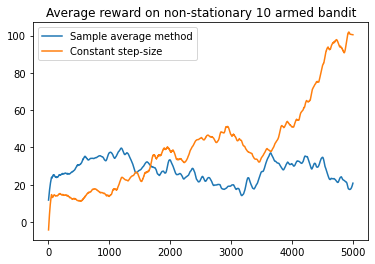

In [220]:
avg_reward_sa_smooth = savgol_filter(avg_reward_sa, 101, 2)
avg_reward_constant_smooth = savgol_filter(avg_reward_constant, 101, 2)

plt.plot(steps, avg_reward_sa_smooth, label='Sample average method')
plt.plot(steps, avg_reward_constant_smooth, label=r'Constant step-size')
plt.title('Average reward on non-stationary 10 armed bandit')
plt.legend()

For agents with $>3500$ iterations, we can see a significant uptick in the average reward of agents with a constant step size.
This is due to more recent rewards having greater importance because of the exponential recently-weighted average.

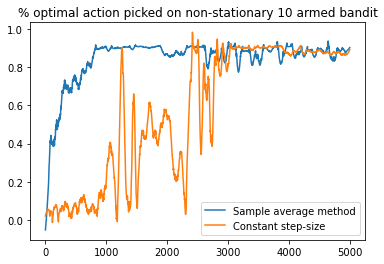

In [221]:
optimal_action_sa_smooth = savgol_filter(opt_pct_sa, 101, 2)
optimal_action_constant_smooth = savgol_filter(opt_pct_constant, 101, 2)
plt.plot(steps, optimal_action_sa_smooth, label='Sample average method')
plt.plot(steps, optimal_action_constant_smooth, label=r'Constant step-size')
plt.title('% optimal action picked on non-stationary 10 armed bandit')
plt.legend()

# TODO find out what's going on here, and why spike exists at 3500 iterations above